**Speech-Emotion Recognition**

In [50]:
#importing necessary elements
import pandas as pd
import numpy as np
import glob
import soundfile as sf
import os
import sys

In [51]:
import seaborn as sbn
import matplotlib.pyplot as mplt
from sklearn import metrics

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [61]:
from IPython.display import Audio

In [53]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [54]:
#load the dataset
rdsdata = "/content/sample_data/ravdes_data"

In [55]:
#preprocessing the data
rds_directory_list = os.listdir(rdsdata)
file_emotion=[]
file_path=[]
for file in rds_directory_list:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(rdsdata+'/'+file)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])
rds_df = pd.concat([emotion_df,path_df], axis=1)

In [56]:
rds_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgusting', 8:'surprised'}, inplace= True)
rds_df

,Emotions,Path
0,angry,/content/sample_data/ravdes_data/03-01-05-01-0...
1,neutral,/content/sample_data/ravdes_data/03-01-01-01-0...
2,sad,/content/sample_data/ravdes_data/03-01-04-01-0...
3,fear,/content/sample_data/ravdes_data/03-01-06-01-0...
4,angry,/content/sample_data/ravdes_data/03-01-05-01-0...
...,...,...
80,sad,/content/sample_data/ravdes_data/03-01-04-01-0...
81,sad,/content/sample_data/ravdes_data/03-01-04-01-0...
82,sad,/content/sample_data/ravdes_data/03-01-04-01-0...
83,disgusting,/content/sample_data/ravdes_data/03-01-07-01-0...


In [57]:
#new data in csv format
data_path = pd.concat([rds_df], axis=0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,angry,/content/sample_data/ravdes_data/03-01-05-01-0...
1,neutral,/content/sample_data/ravdes_data/03-01-01-01-0...
2,sad,/content/sample_data/ravdes_data/03-01-04-01-0...
3,fear,/content/sample_data/ravdes_data/03-01-06-01-0...
4,angry,/content/sample_data/ravdes_data/03-01-05-01-0...


In [34]:
#import librosa
import librosa
import librosa.display

In [58]:
#function for waveplot
def create_wave(data, sr, e):
    mplt.figure(figsize=(10,3))
    mplt.title('waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    mplt.show()

In [59]:
#function for spectrogram
def create_spectro(data, sr, e):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    mplt.figure(figsize=(12,3))
    mplt.title('Spectrogram for audio {} emotion'.format(e), size=15)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    mplt.colorbar()

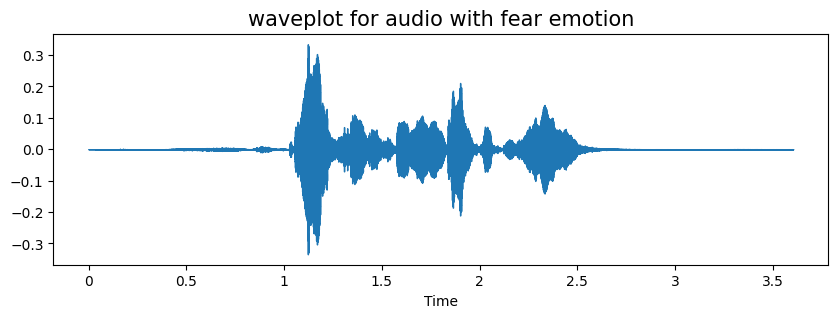

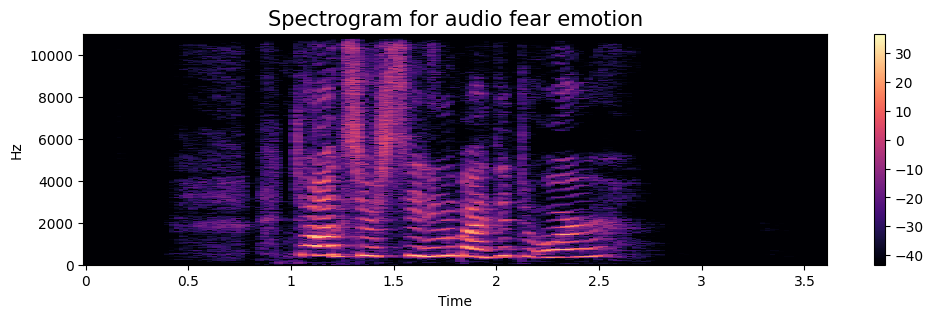

In [62]:
#waveplot and spectrogram of fear emotion
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_wave(data, sampling_rate, emotion)
create_spectro(data, sampling_rate, emotion)
Audio(path)

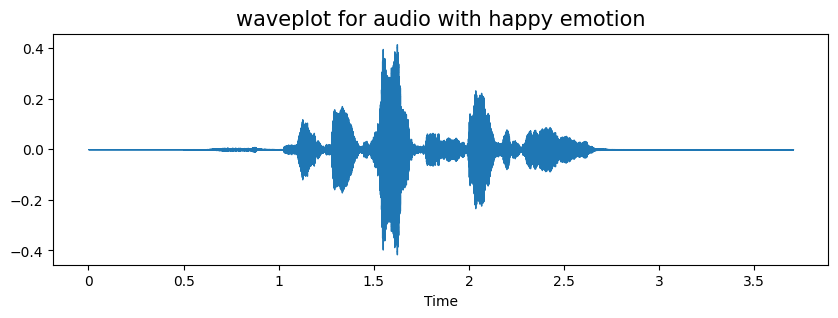

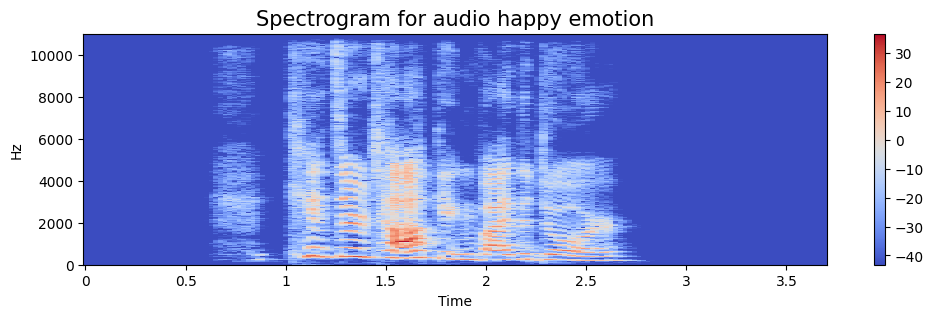

In [63]:
#waveplot and spectrogram of happy emotion
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_wave(data, sampling_rate, emotion)
create_spectro(data, sampling_rate, emotion)
Audio(path)

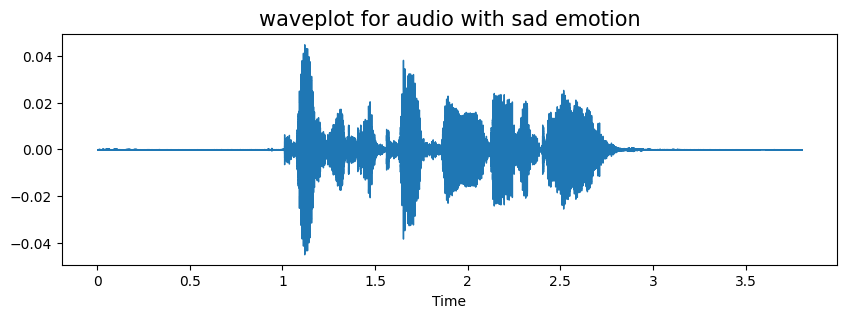

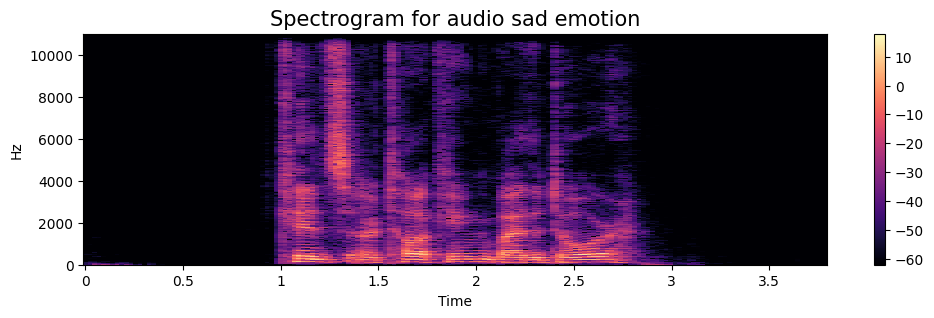

In [64]:
#waveplot and spectrogram of sad emotion
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_wave(data, sampling_rate, emotion)
create_spectro(data, sampling_rate, emotion)
Audio(path)

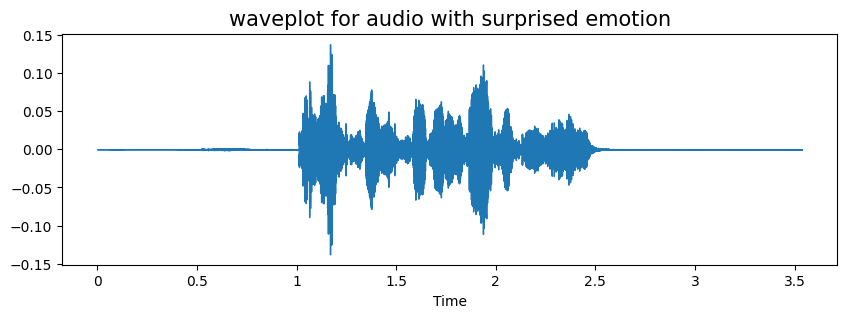

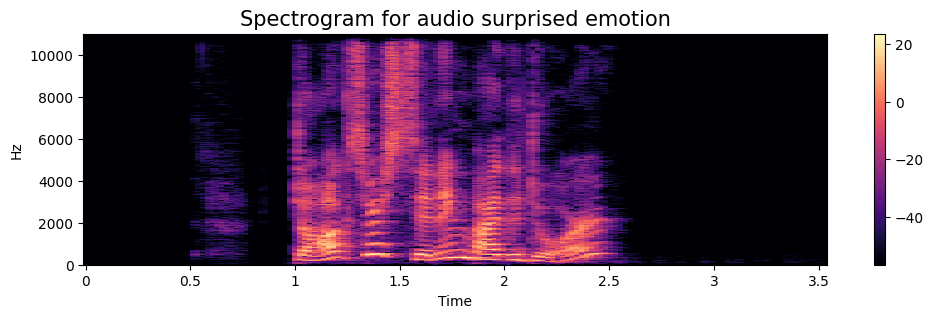

In [65]:
#waveplot and spectrogram of surprise emotion
emotion='surprised'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_wave(data, sampling_rate, emotion)
create_spectro(data, sampling_rate, emotion)
Audio(path)

In [36]:
#function to extract the necessary functions
def extract_feature(file_name, mfcc, chroma, mel):
        x,sampling_rate = sf.read(file_name)
        if chroma:
            stft=np.abs(librosa.stft(x))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=x, sr=sampling_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sampling_rate).T, axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=x, sr=sampling_rate).T, axis=0)
            result=np.hstack((result, mel))
        return result

In [37]:
#function to load the dataset to x and y
def load_data(test_size=0.2):
    x,y=[],[]
    for file in data_path['Emotions']:
        y.append(file)
    for file in data_path['Path']:
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
    return train_test_split(np.array(x),y, test_size=test_size, random_state=3)

In [38]:
#splitting the training and testing data
xtrain,xtest,ytrain,ytest=load_data(test_size=0.2)

In [39]:
print((xtrain.shape[0], xtest.shape[0]))

(68, 17)


In [40]:
print(f'Features extracted: {xtrain.shape[1]}')

Features extracted: 180


In [69]:
# MLP   Classifier
model = MLPClassifier(alpha=0.01,epsilon=1e-08, hidden_layer_sizes=(300), learning_rate='adaptive')

In [70]:
#training the model
model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=300, learning_rate='adaptive')

In [71]:
#predicting on test data
predtest= model.predict(xtest)
predtest

array(['fear', 'neutral', 'surprised', 'calm', 'fear', 'disgusting',
       'disgusting', 'angry', 'fear', 'fear', 'sad', 'sad', 'angry',
       'happy', 'angry', 'surprised', 'sad'], dtype='<U10')

In [68]:
#accuracy score
accuracy = accuracy_score(predtest,ytest)
print('Accuracy score =',accuracy*100)

Accuracy score = 88.23529411764706


In [66]:
#classification report
print(classification_report(ytest, predtest))

              precision    recall  f1-score   support

       angry       1.00      0.50      0.67         4
        calm       1.00      1.00      1.00         1
  disgusting       1.00      1.00      1.00         2
        fear       1.00      1.00      1.00         4
       happy       1.00      1.00      1.00         1
     neutral       1.00      1.00      1.00         1
         sad       0.50      1.00      0.67         2
   surprised       1.00      1.00      1.00         2

    accuracy                           0.88        17
   macro avg       0.94      0.94      0.92        17
weighted avg       0.94      0.88      0.88        17

